このノートブック/コードは佐々木翔氏に作成していただいたものをベースにしています。

In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
np.random.seed(seed=123)

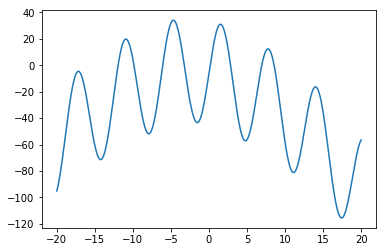

In [2]:
#Define data, supervised data
#NOTE: Omitting the random value in the target_func for compatiblity with "BayesianOptimizaiont" library
def target_func(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) 
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx).reshape(-1, 1)
#NOTE: By omitting the random value, simply use vecotrized call is avaialble
z = target_func(x)

plt.plot(x, z);

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  12.26    |  7.859    |
|  2        | -44.03    | -8.554    |
|   iter    |  target   |     x     |
-------------------------------------
|  3        | -92.79    |  16.33    |
|   iter    |  target   |     x     |
-------------------------------------
|  4        |  12.27    |  7.857    |
|   iter    |  target   |     x     |
-------------------------------------
|  5        |  12.29    |  7.85     |
|   iter    |  target   |     x     |
-------------------------------------
|  6        |  12.35    |  7.834    |
|   iter    |  target   |     x     |
-------------------------------------
|  7        |  12.45    |  7.777    |
|   iter    |  target   |     x     |
-------------------------------------
|  8        |  12.46    |  7.757    |
|   iter    |  target   |     x     |
-------------------------------------
|  9        |  12.46    |  7.759    |
|   iter    |  target   |     x     |
------------

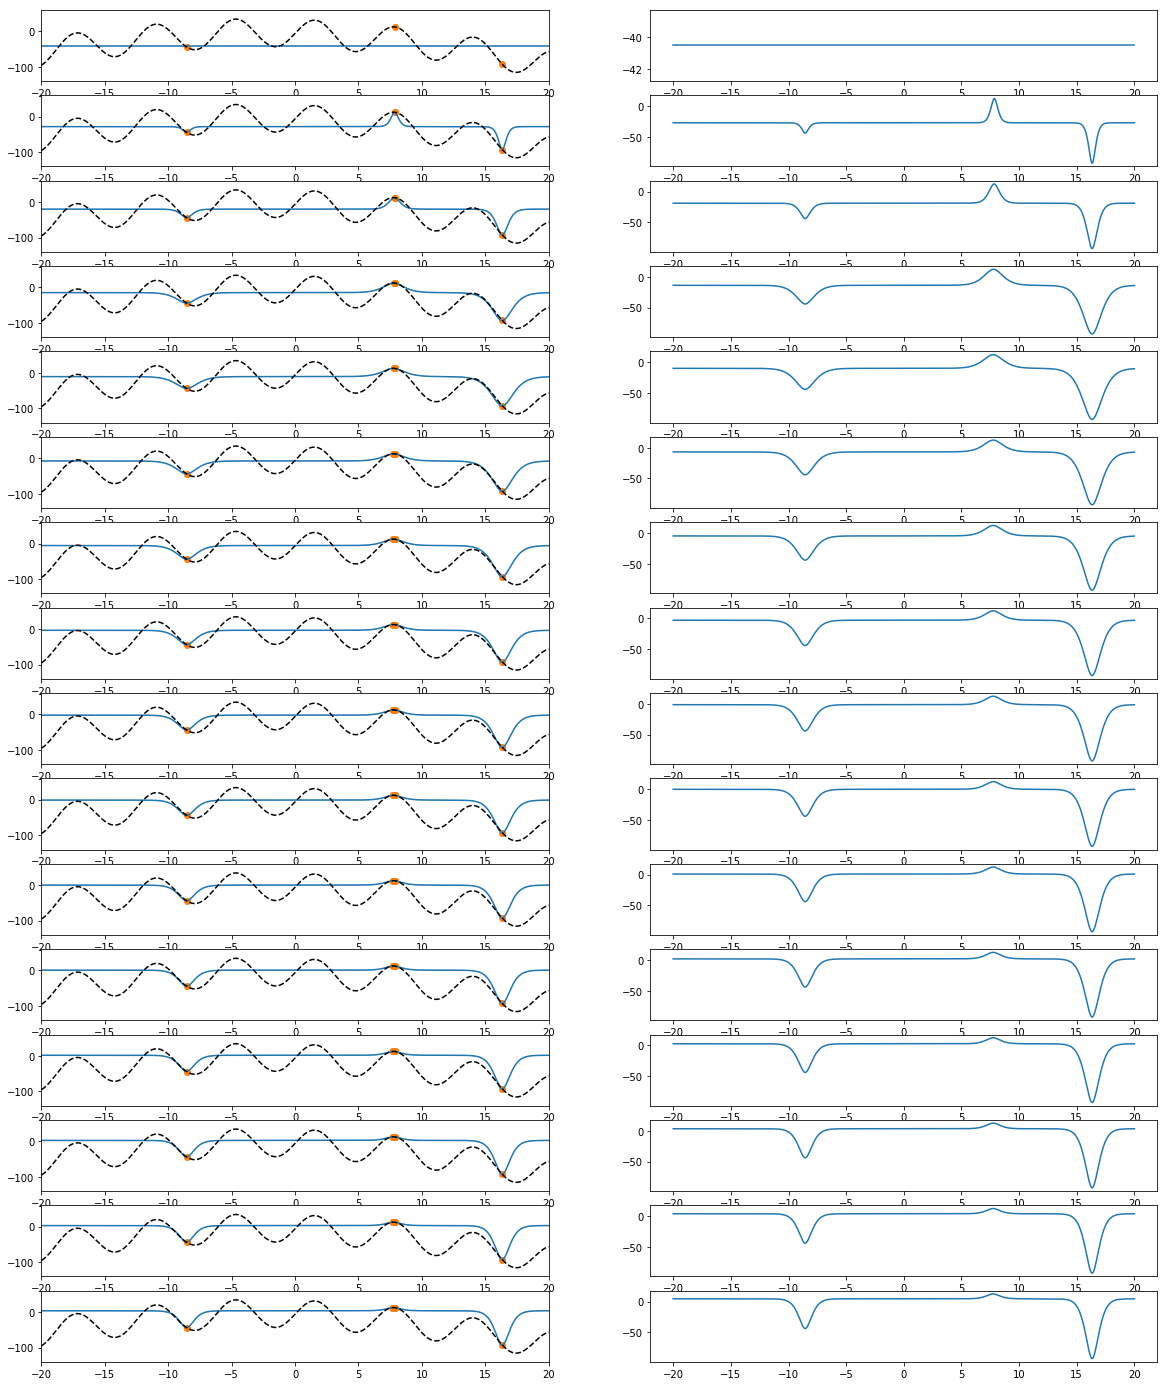

# Actual value of maximum is [34.12625438]
# Got value in the Bayesian_opt is 12.457596039789596
# Optimization is finished.


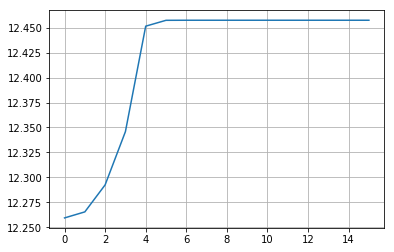

In [3]:
optimizer = BayesianOptimization(target_func, {'x': (xmin, xmax)}, random_state=123)
#acqui_name = 'ei'
#acqui_name = 'poi'
acqui_name = 'ucb'
kappa = 1.0
maxval_list = []
#
epoch = 16 #Number of optimization
Nplotevery = 1
maxval = 'Initial'
plt.figure(figsize=(20, 50))
optimizer.maximize(init_points=2, n_iter=0, kappa=kappa)
for i in range(epoch):
    optimizer.maximize(init_points=0, n_iter=1, kappa=kappa)
    x_sample = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_sample = np.array([res["target"] for res in optimizer.res])

    optimizer._gp.fit(x_sample, y_sample)
    mean, std = optimizer._gp.predict(x, return_std=True)

    maxval = max(y_sample)                                                     #Update maximum value up to now
    maxval_list.append(maxval)
    utility_function = UtilityFunction(kind=acqui_name, kappa=kappa, xi=0)
    acqui = utility_function.utility(x, optimizer._gp, 0)
    if(i%Nplotevery==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x,np.array(mean))
        plt.plot(x,z,'k--')
        high_bound = mean+ 1.0*std
        lower_bound = mean- 1.0*std
        plt.fill_between(x[:,0],high_bound,lower_bound, alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(-140,60)
        plt.scatter(x_sample,y_sample)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x,acqui)
        plt.savefig("bayes_"+str(acqui_name)+".png")
plt.show()

print("# Actual value of maximum is "+str(max(z)))
print("# Got value in the Bayesian_opt is "+str(maxval))
print("# Optimization is finished.")
plt.figure()
plt.plot(maxval_list)
plt.grid()
plt.show()